### 1. Importei as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

### 2. Carreguei o dataset

In [2]:
data = pd.read_csv('telecom_churn.csv')
data.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


### 3. Verifiquei o tamanho e o tipo de dados

In [3]:
print(f'O tamanho do dataframe é: {data.shape}')
print(f'O tipo de dados é: {data.dtypes}')
data.info()

O tamanho do dataframe é: (3333, 11)
O tipo de dados é: Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee     

### 4. Verifiquei a existência de valores nulos e duplicados

In [4]:
print(f'A quantidade de valores nulos é: {data.isnull().sum().sum()}')
print(f'A quantidade de valores duplicados é: {data.duplicated().sum()}')

A quantidade de valores nulos é: 0
A quantidade de valores duplicados é: 0


### 5. Renomeei as colunas para facilitar a manipulação

In [5]:
cols = data.columns
cols = cols.str.replace(' ', '_')
cols = cols.str.lower()
data.columns = cols

data.columns = ['churn', 'account_weeks', 'contract_renewal', 'data_plan', 'data_usage',
       'cust_serv_calls', 'day_mins', 'day_calls', 'monthly_charge', 'overage_fee',
       'roam_mins']

data.columns

Index(['churn', 'account_weeks', 'contract_renewal', 'data_plan', 'data_usage',
       'cust_serv_calls', 'day_mins', 'day_calls', 'monthly_charge',
       'overage_fee', 'roam_mins'],
      dtype='object')

### 6. Criei um dataframe com as variáveis categóricas e um com as numéricas

In [6]:
data_num = data[['churn', 'account_weeks', 'contract_renewal', 'data_plan', 'data_usage',
       'cust_serv_calls', 'day_mins', 'day_calls', 'monthly_charge',
       'overage_fee', 'roam_mins']]
data_cat = data[['churn', 'contract_renewal', 'data_plan']]
data_num.head()

,churn,account_weeks,contract_renewal,data_plan,data_usage,cust_serv_calls,day_mins,day_calls,monthly_charge,overage_fee,roam_mins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### 7. Converti as colunas do dataframe numérico para o tipo 'float'

In [7]:
data_num = data_num.astype('float')
data_num.dtypes

churn               float64
account_weeks       float64
contract_renewal    float64
data_plan           float64
data_usage          float64
cust_serv_calls     float64
day_mins            float64
day_calls           float64
monthly_charge      float64
overage_fee         float64
roam_mins           float64
dtype: object

### 8. Converti as colunas do dataframe categórico para o tipo 'string'

In [8]:
data_cat = data_cat.astype('string')
data_cat.dtypes

churn               string
contract_renewal    string
data_plan           string
dtype: object

### 9. Renomeei os valores das colunas 'churn', 'contract_renewal' e 'data_plan' para facilitar a manipulação

In [9]:
data_cat['churn'] = data_cat['churn'].replace({'0': 'No', '1': 'Yes'})
data_cat['contract_renewal'] = data_cat['contract_renewal'].replace({'0': 'No', '1': 'Yes'})
data_cat['data_plan'] = data_cat['data_plan'].replace({'0': 'No', '1': 'Yes'})
data_cat.head()

,churn,contract_renewal,data_plan
0,No,Yes,Yes
1,No,Yes,Yes
2,No,Yes,No
3,No,No,No
4,No,No,No


### 10. Verifiquei a correlação entre as variáveis numéricas utilizando o heatmap

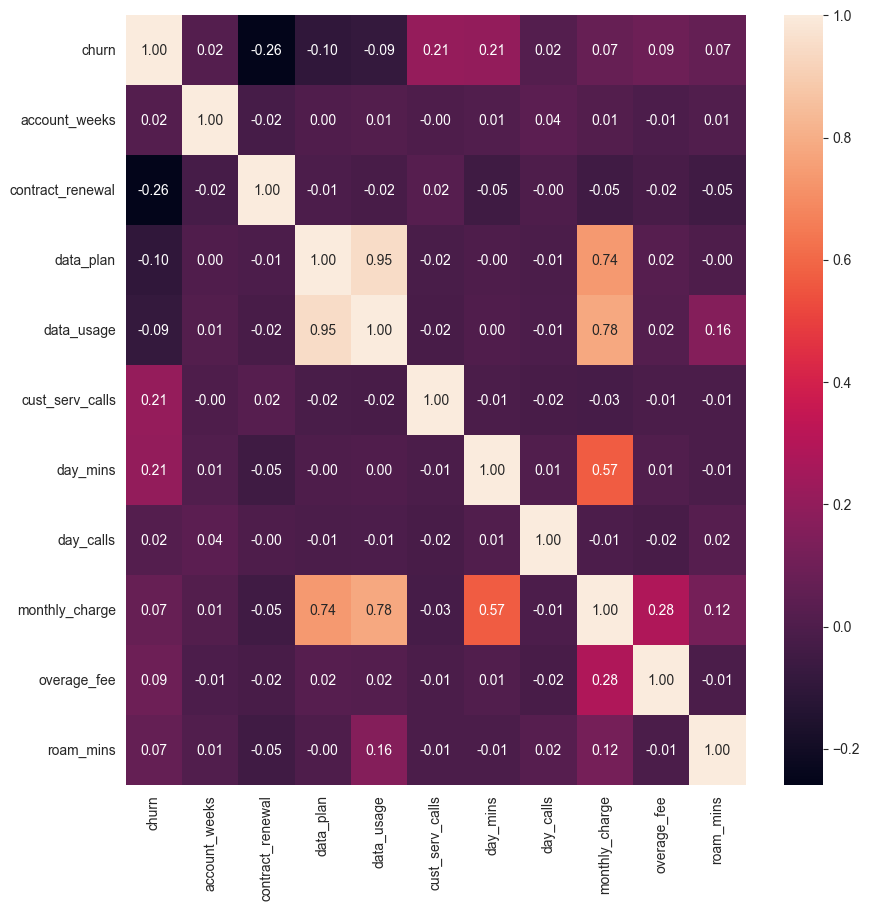

In [10]:
corr = data_num.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

**Variáveis com mais corelação com 'churn'**
1. **'cust_serv_calls'** - Podemos observar que quanto maior o número de ligações para o serviço de atendimento, maior a chance de o cliente cancelar o serviço.
2. **'monthly_charge'** - Podemos observar que quanto maior o valor da mensalidade, maior a chance de o cliente cancelar o serviço.
3. **'overage_fee'** - Podemos observar que quanto maior o valor da taxa de excesso, maior a chance de o cliente cancelar o serviço.
4. **'day_mins'** - Podemos observar que quanto maior o número de minutos utilizados durante o dia, maior a chance de o cliente cancelar o serviço.
5. **'roam_mins'** - Podemos observar que quanto maior o número de minutos utilizados em locais onde não existe cobertura da operadora, maior a chance de o cliente cancelar o serviço.
6. **'account_weeks'** - Podemos observar que quanto maior o número de semanas que o cliente está com a operadora, menor a chance de o cliente cancelar o serviço.

**A correlação entre as variáveis numéricas é baixa, o que indica que não há multicolinearidade. Porém, Podemos afirmar que a operadora não tem uma cobertura de alcance satisfatório para o cliente (persona) e os valores relacionados ao serviço são considerados altos pelo mesmo. Além disso, há uma alta chance de que os clientes que entram em contato com o canal da operadora mais frequentemente cancelem seus planos.**

### 11. Verifiquei a distribuição das variáveis numéricas principais com o histograma utilizando churn como hue

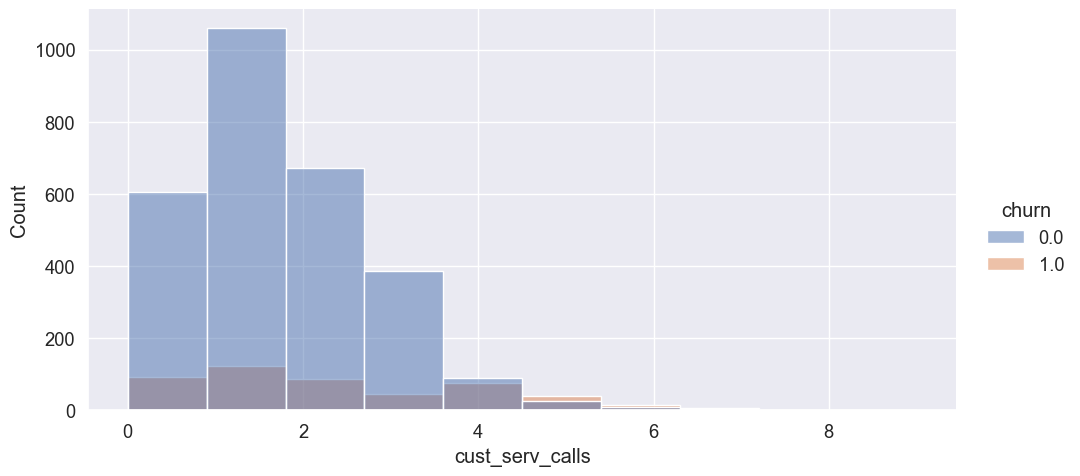

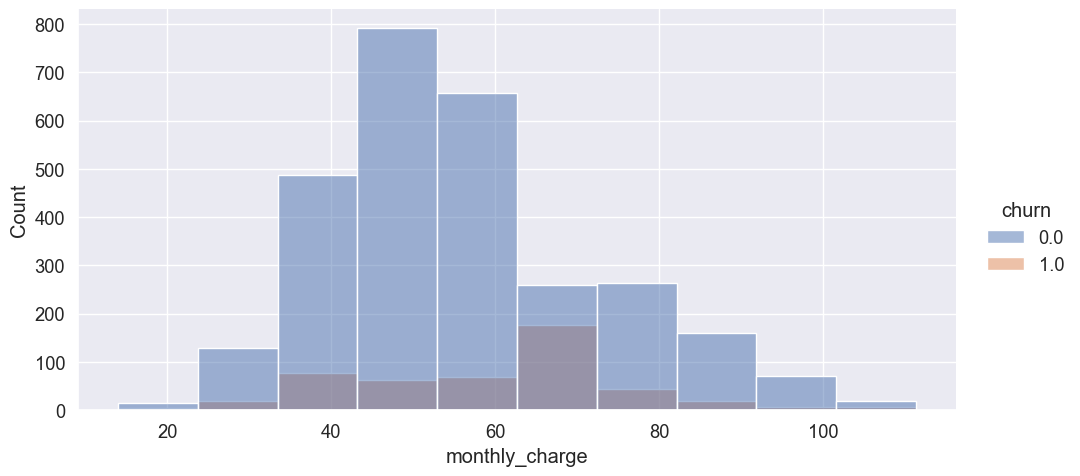

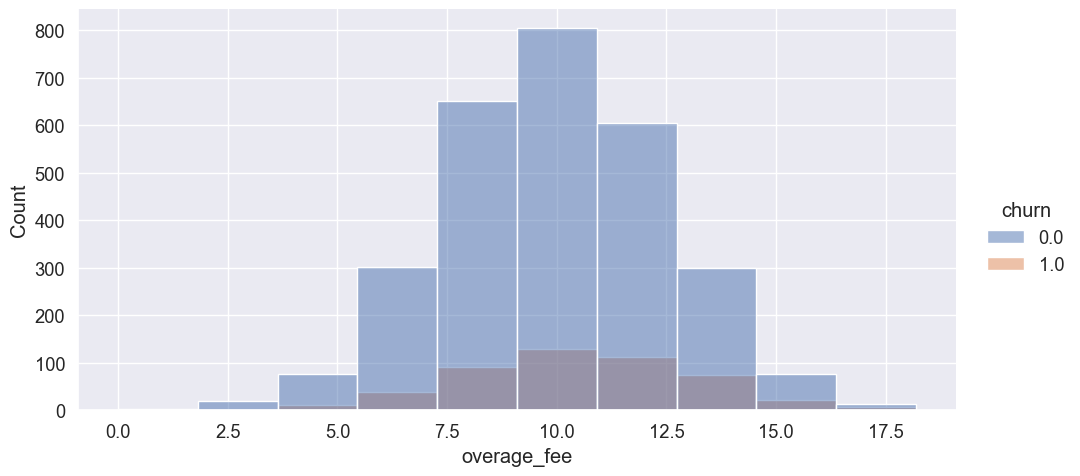

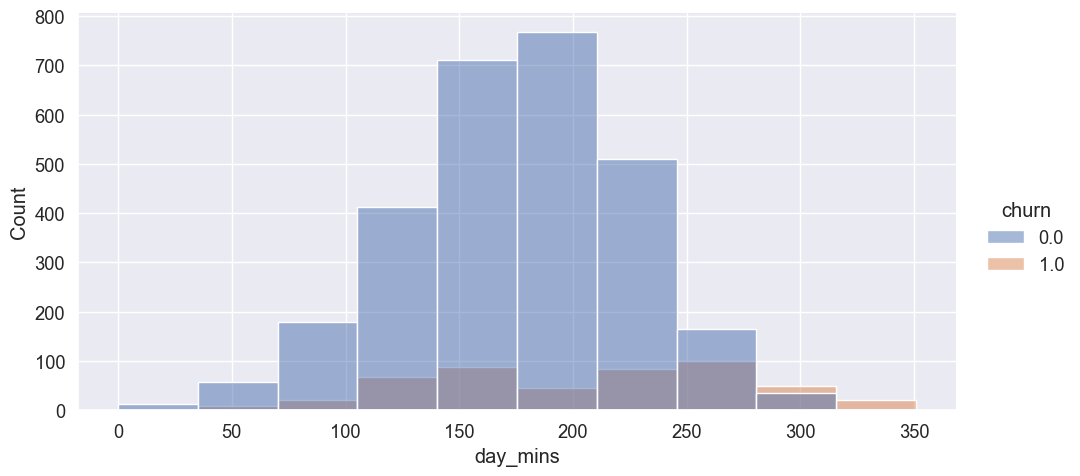

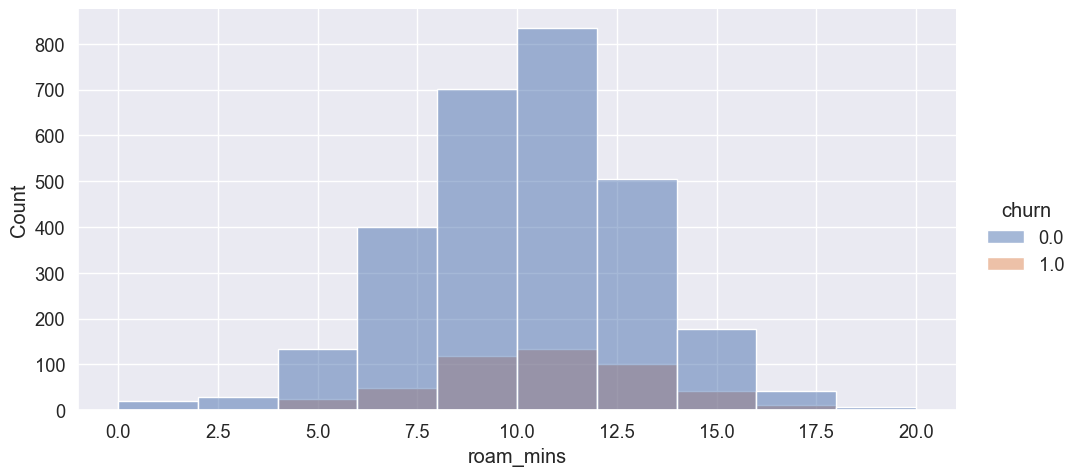

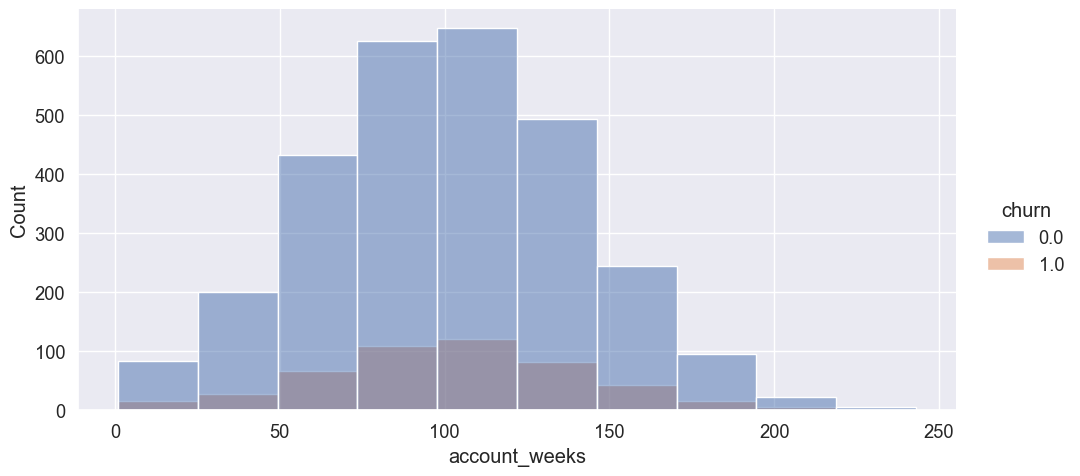

In [11]:
sns.set_palette('Set2')
sns.set_context('talk')
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.displot(data_num, x='cust_serv_calls', hue='churn', kind='hist', bins=10, height=5, aspect=2)
sns.displot(data_num, x='monthly_charge', hue='churn', kind='hist', bins=10, height=5, aspect=2)
sns.displot(data_num, x='overage_fee', hue='churn', kind='hist', bins=10, height=5, aspect=2)
sns.displot(data_num, x='day_mins', hue='churn', kind='hist', bins=10, height=5, aspect=2)
sns.displot(data_num, x='roam_mins', hue='churn', kind='hist', bins=10, height=5, aspect=2)
sns.displot(data_num, x='account_weeks', hue='churn', kind='hist', bins=10, height=5, aspect=2)
plt.show()

**Ligações ao serviço** - A ligação entre a quantidade de ligações e o churn é bem clara, quanto maior o número de ligações, maior a chance de o cliente cancelar o serviço. Porém, a quantidade de ligações não é um fator determinante para o cancelamento do serviço, pois há clientes que cancelaram o serviço com poucas ligações e clientes que não cancelaram o serviço com muitas ligações.

**Mensalidade** - A ligação entre a mensalidade e o churn é bem clara, quanto maior o valor da mensalidade, maior a chance de o cliente cancelar o serviço. Podemos assumir que ***RS70*** é um valor muito alto para a maioria dos clientes que fizeram cancelamento.

**Taxa de excesso** - A ligação entre a taxa de excesso e o churn é bem clara, quanto maior o valor da taxa de excesso, maior a chance de o cliente cancelar o serviço. Podemos assumir que **$10** é um valor muito alto para a maioria dos clientes que fizeram cancelamento, porém, é o valor médio de Overage Fee dos clientes que não cancelaram o serviço, logo, não é um fator determinante para o cancelamento do serviço.

**Minutos utilizados durante o dia** - A ligação entre os minutos utilizados durante o dia e o churn é bem clara, quanto maior o número de minutos utilizados durante o dia, maior a chance de o cliente cancelar o serviço. Porém, a quantidade de minutos utilizados durante o dia não é um fator determinante para o cancelamento do serviço, pois há clientes que cancelaram o serviço com poucos minutos utilizados durante o dia e clientes que não cancelaram o serviço com muitos minutos utilizados durante o dia.

**Minutos utilizados em locais onde não existe cobertura da operadora** - A ligação entre os minutos utilizados em locais onde não existe cobertura da operadora e o churn é bem clara, quanto maior o número de minutos utilizados em locais onde não existe cobertura da operadora, maior a chance de o cliente cancelar o serviço. Porém, a quantidade de minutos utilizados em locais onde não existe cobertura da operadora não é um fator determinante para o cancelamento do serviço, pois há clientes que cancelaram o serviço com poucos minutos utilizados em locais onde não existe cobertura da operadora e clientes que não cancelaram o serviço com muitos minutos utilizados em locais onde não existe cobertura da operadora.

**Número de semanas que o cliente está com a operadora** - A ligação entre o número de semanas que o cliente está com a operadora e o churn é bem clara, quanto maior o número de semanas que o cliente está com a operadora, menor a chance de o cliente cancelar o serviço. Porém, o número de semanas que o cliente está com a operadora não é um fator determinante para o cancelamento do serviço, pois há clientes que cancelaram o serviço com poucas semanas que o cliente está com a operadora e clientes que não cancelaram o serviço com muitas semanas que o cliente está com a operadora.

**Fator determinante** - Pode-se determinar que os fatores mais determinante para o cancelamento do serviço são o alto custo da mensalidade e da taxa de excesso que podem ser considerados altos para a maioria dos clientes. Além disso, o número de ligações ao serviço também é um fator determinante para o cancelamento do serviço, pois quanto maior o número de ligações, maior a chance de o cliente cancelar o serviço.

### 12. Verifiquei a distribuição das variáveis categóricas principais com o countplot utilizando churn como hue

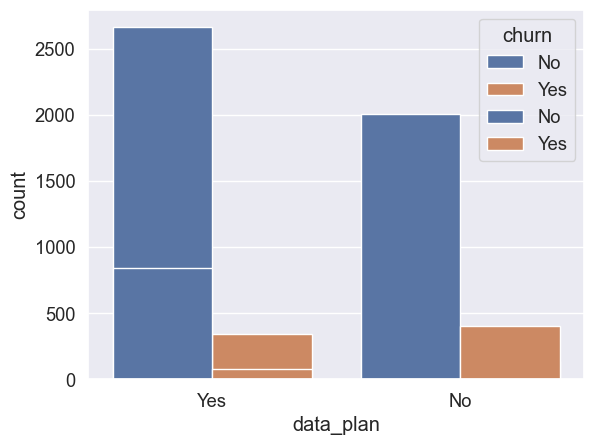

In [12]:
sns.set_palette('Set2')
sns.set_context('talk')
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.countplot(data=data_cat, x='contract_renewal', hue='churn')
sns.countplot(data=data_cat, x='data_plan', hue='churn')
plt.show()

**Podemos observar que a maioria dos clientes que cancelaram o serviço não possuem plano de dados e não renovaram o contrato. Porém, a diferença entre o 'yes' e o 'no' em ambos os senários é muito pequeno.**

## Previsão de Churn utilizando o dataset numérico

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

### 1. Dropei as colunas que não serão utilizadas no modelo

In [14]:
cols = ['churn', 'account_weeks', 'cust_serv_calls', 'day_mins', 'day_calls', 'monthly_charge', 'overage_fee', 'roam_mins']
data_model = data_num[cols]

**Podemos observar que as variáveis mais importantes para o modelo são:**
- **account_weeks** - Número de semanas que o cliente está com a operadora
- **roam_mins** - Minutos utilizados em locais onde não existe cobertura da operadora
- **day_mins** - Minutos utilizados durante o dia
- **day_calls** - Número de ligações realizadas durante o dia
- **month_charge** - Valor da mensalidade
- **overage_fee** - Valor da taxa de excesso
- **cust_serv_calls** - Número de ligações ao serviço

### 2. Dividi o dataset em treino e teste

In [15]:
X = data_model.drop('churn', axis=1)
y = data_model['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### 3. Padronizei os dados

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 4. Treinei o modelo

In [17]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

### 5. Realizei as previsões

In [18]:
predictions = logmodel.predict(X_test)

### 6. Avaliei o modelo

In [19]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[861   8]
 [124   7]]
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       869
         1.0       0.47      0.05      0.10       131

    accuracy                           0.87      1000
   macro avg       0.67      0.52      0.51      1000
weighted avg       0.82      0.87      0.82      1000



**Podemos observar que o modelo obteve uma acurácia de 86%**

### 7. Criei uma função para realizar a previsão de churn

In [20]:
def churn_prediction(account_weeks, cust_serv_calls, day_mins, day_calls, monthly_charge, overage_fee, roam_mins):
    X = np.array([account_weeks, cust_serv_calls, day_mins, day_calls, monthly_charge, overage_fee, roam_mins]).reshape(1, -1)
    X = scaler.transform(X)
    prediction = logmodel.predict(X)
    if prediction == 1:
        print('O cliente irá cancelar o serviço')
    else:
        print('O cliente não irá cancelar o serviço')

### 8. Testei a função com os dados de um cliente que cancelou o serviço

In [21]:
churn_prediction(100, 1, 200, 100, 50, 10, 5)

O cliente não irá cancelar o serviço


C:\Users\Admin\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
churn_prediction(2, 60, 200, 100, 50, 10, 80)

O cliente irá cancelar o serviço


C:\Users\Admin\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Podemos observar que o modelo obteve sucesso ao prever o cancelamento dos serviço baseando-se nos dados óbvios**

### 9. Testei a função com os dados de um cliente que não cancelou o serviço

In [23]:
churn_prediction(100, 1, 200, 100, 50, 10, 5)

O cliente não irá cancelar o serviço


C:\Users\Admin\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 10. Exportei o dataset model para o arquivo churn_model.csv com separação por ; para ser utilizado no app onde o modelo será implementado

In [25]:
data_model.to_csv('churn_model.csv', sep=';', index=False)